#### PyTorch Computer Vision Introduction Notebook

## 0. Computer vision libraries in PyTorch

* `torchvision`: - base domain library for PyTorch, which includes computer vision datasets, model architectures, and image transformations.
* `torchvision.datasets`: - get datasets and data loading functions for computer vision
* `torchvision.models`: get pretrained computer vision models that you can leverage for you own problems
* `torchvision.transforms`: common image transformations that can be composed together

* `torch.utils.data.DataLoader`: - provides an iterable over a dataset, with support for map-style and iterable-style datasets
* `torch.utils.data.Dataset`: - an abstract class representing a dataset

In [117]:
# Import PyTorch
import torch
from torch import nn

# Import the torchvision
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import maptlotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cpu
0.20.1+cpu


## 1. Getting a dataset

The dataset we'll be using is fashionMNIST from torchvision.datasets


In [118]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [119]:
len(train_data), len(test_data)

(60000, 10000)

In [120]:
# See the first training example
image, label = train_data[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


In [121]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [122]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [123]:
# Check the shape of our image
image.shape, label

(torch.Size([1, 28, 28]), 9)

## 1.2 Visualizing our data

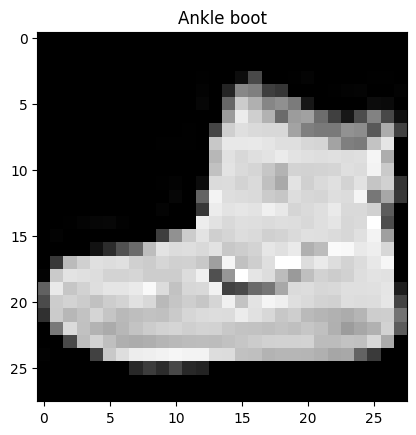

In [124]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.show()

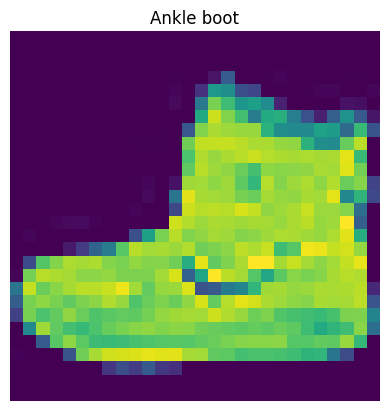

In [125]:
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis('off');

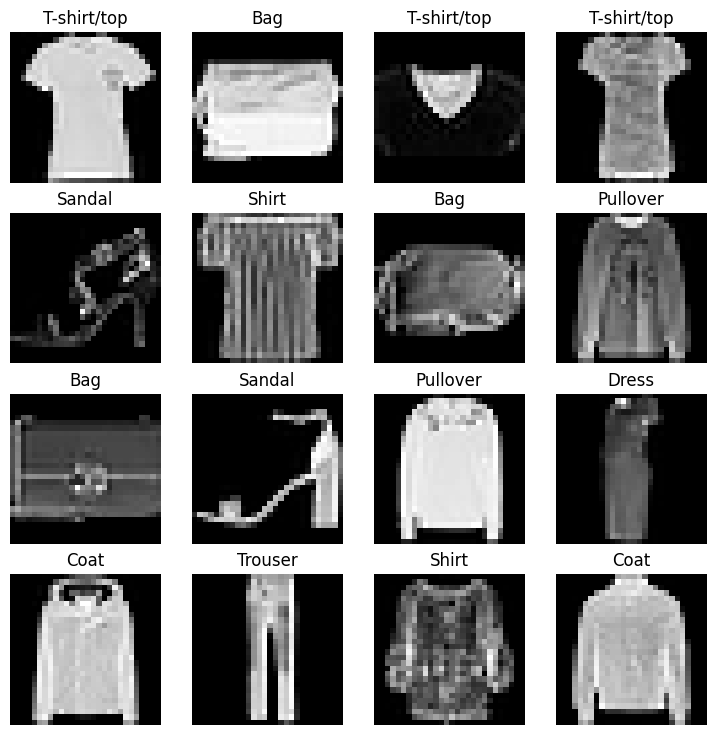

In [126]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    image, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(class_names[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

we want to shuffle our data and load it in batches.

why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.

In [127]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn the data into dataloaders
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23deb73b890>,
 <torch.utils.data.dataloader.DataLoader at 0x23de7ec6660>)

In [128]:
# Let's Check out 
print(f"Lenght of train dataloader: {len(train_dataloader)} batches")
print(f"Lenght of test dataloader: {len(test_dataloader)} batches")


Lenght of train dataloader: 1875 batches
Lenght of test dataloader: 313 batches


In [129]:
# Check out what's inside the dataloader
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(f"Labels: {train_labels}")
print(f"Feature: {train_features[0]}")

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])
Labels: tensor([5, 4, 9, 0, 2, 5, 8, 1, 3, 9, 4, 0, 8, 1, 4, 9, 0, 7, 8, 1, 5, 3, 3, 4,
        0, 0, 0, 4, 3, 0, 8, 3])
Feature: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000

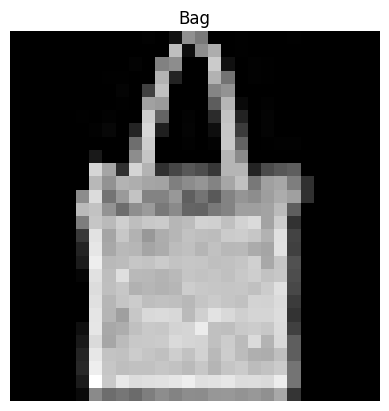

Image Size: torch.Size([28, 28])
Label: 8


In [130]:
# Visualize the batch
torch.manual_seed(42)
random_idx = torch.randint(0, BATCH_SIZE, (1, )).item()
img, label = train_features[random_idx], train_labels[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label.item()])
plt.axis('off')
plt.show()

print(f"Image Size: {img.squeeze().shape}")
print(f"Label: {label}")

## 3. Model 0: Build a baseline model

when starting to build a series of machine leearning modelling eexperiments, it's best practice to start with a baseeline modeel.

A baseline model is a simple model you will try and improve upon with subsequent models.
In other words: start simply and add compleexity when necessary

In [131]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features[0]

# Flatten the sample
output = flatten_model(x)

# pprint out what happened
print(f"Shape of x: {x.size()}")
print(f"Shape of output: {output.size()}")

Shape of x: torch.Size([1, 28, 28])
Shape of output: torch.Size([1, 784])


In [132]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                  input_size: int,
                  hidden_units: int,
                  output_shape: int
                  ):
        super(FashionMNISTModelV0, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )
    
    def forward(self, x):
        logits = self.layer_stack(x)
        return logits

In [133]:
torch.manual_seed(42)
# Setup the input size, hidden units, and output size
input_size = 28*28
hidden_units = 128
output_size = 10

# Instantiate the model
model_0 = FashionMNISTModelV0(input_size, hidden_units, output_size)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [134]:
dummy_x = torch.rand([1,1, 28, 28])
class_names[torch.softmax(model_0(dummy_x), dim=1).argmax(dim=1).item()]

'Ankle boot'

In [135]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
                      [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
                      [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]])),
             ('layer_stack.1.bias',
              tensor([-8.6770e-04,  2.6513e-02,  2.4231e-02,  3.5641e-03, -3.2895e-02,
                       2.1752e-02,  3.3599e-02, -8.3219e-03, -8.0973e-03, -5.9837e-03,
                      -1.4779e-03,  3.3858e-02,  1.4686e-02, -3.0424e-02, -1.8899e-02,
                      -2.9557e-03, -1.8481e-02, -3.1352e-02,  1.0393e-02,  2.9328e-02,
                       7.0543e-03, -4.0150e-

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss Function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss`

* Optimizer - we will use `torch.optim.Adam` as our optimizer

* Evaluation Metrics - we will use accuracy as our evaluation metrics

In [136]:
from torchmetrics import Accuracy

acc = Accuracy(task='multiclass', num_classes=10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [137]:
acc

MulticlassAccuracy()

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Twos of the main things you'll often want to track are:
1. Model's performance (e.g. loss, accuracy)
2. How fast your model runs

In [138]:
from timeit import default_timer as timer
def print_train_time(start, end, device: torch.device = None):
    print(f"Training Time: {end-start:.5f} seconds")
    return (end-start)

In [139]:
start_time = timer()
end_time = timer()

print_train_time(start_time, end_time)

Training Time: 0.00004 seconds


3.6599813029170036e-05

### 3.2 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).

In [140]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [145]:
# Import tqdm for the progress bar
from tqdm.auto import tqdm
from torchmetrics import Accuracy
from timeit import default_timer as timer

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs 
EPOCHS = 3

# Define accuracy metric (for classification)
acc = Accuracy(task="multiclass", num_classes=10).to(device)

# Create training and test loop
for epoch in tqdm(range(EPOCHS), desc="Epochs"):
    print(f"Epoch: {epoch}\n-------------------------------")
    
    ### Training Phase ###
    train_loss = 0  # Accumulate training loss
    model_0.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)  # Move data to device

        # Forward pass
        y_pred = model_0(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Accumulate loss as a scalar

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print progress
        if batch % 300 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    
    # Average the train loss over all batches
    train_loss /= len(train_dataloader)

    ### Testing Phase ###
    test_loss = 0  # Accumulate test loss
    acc.reset()  # Reset accuracy metric
    model_0.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)  # Move data to device

            # Forward pass
            y_pred = model_0(X)
            
            # Calculate the loss
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()  # Accumulate test loss as a scalar

            # Calculate accuracy
            acc.update(y_pred.argmax(dim=1), y)

        # Calculate average test loss and accuracy
        test_loss /= len(test_dataloader)
        test_acc = acc.compute() * 100  # Compute accuracy percentage

    # Print epoch metrics
    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

# Calculate training time
train_time_end_on_cpu = timer()

# Print out the training time
def print_train_time(start, end):
    elapsed_time = end - start
    print(f"Training time: {elapsed_time:.2f} seconds")
    return elapsed_time

total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu)


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------------------
Looked at 0/60000 samples
Looked at 9600/60000 samples
Looked at 19200/60000 samples
Looked at 28800/60000 samples
Looked at 38400/60000 samples
Looked at 48000/60000 samples
Looked at 57600/60000 samples


Epochs:  33%|███▎      | 1/3 [00:11<00:22, 11.46s/it]

Train Loss: 0.4543, Test Loss: 0.4712, Test Accuracy: 83.58%
Epoch: 1
-------------------------------
Looked at 0/60000 samples
Looked at 9600/60000 samples
Looked at 19200/60000 samples
Looked at 28800/60000 samples
Looked at 38400/60000 samples
Looked at 48000/60000 samples
Looked at 57600/60000 samples


Epochs:  67%|██████▋   | 2/3 [00:22<00:11, 11.34s/it]

Train Loss: 0.4436, Test Loss: 0.4679, Test Accuracy: 83.69%
Epoch: 2
-------------------------------
Looked at 0/60000 samples
Looked at 9600/60000 samples
Looked at 19200/60000 samples
Looked at 28800/60000 samples
Looked at 38400/60000 samples
Looked at 48000/60000 samples
Looked at 57600/60000 samples


Epochs: 100%|██████████| 3/3 [00:34<00:00, 11.38s/it]

Train Loss: 0.4359, Test Loss: 0.4688, Test Accuracy: 83.74%
Training time: 34.14 seconds


## 4. Make predictions and get Model 0 results

In [39]:
import torchmetrics

In [40]:
torch.manual_seed(42)
def eval_model(
        model: torch.nn.Module,
        data_loader : torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        acc: torchmetrics.Accuracy
):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    """
    acc.to(device)
    loss_fn.to(device)
    loss= 0
    model.eval()
    acc.reset()

    with torch.inference_mode():
        for X, y in tqdm(data_loader, desc="Batches"):
            X, y = X.to(device), y.to(device)

            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc.update(y_pred.argmax(dim=1), y)

       # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc = acc.compute() * 100

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(), 
            "model_acc": acc}

# Evaluate the model
acc = Accuracy(task="multiclass", num_classes=10).to(device)
results = eval_model(model_0, test_dataloader, loss_fn, acc=acc)

Batches: 100%|██████████| 313/313 [00:06<00:00, 51.98it/s]


In [41]:
from pprint import pprint
pprint(results)

{'model_acc': tensor(83.8700),
 'model_loss': tensor(0.4665),
 'model_name': 'FashionMNISTModelV0'}


## 5. Setup device agnostic-code (for using a GPU if there is one)

In [42]:
# device agnostic code
def get_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
device = get_device()
device

device(type='cpu')

### 5.1 Creating non-linear model that runs on GPU

In [43]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

# Setup few hyper parameters
input_shape = 28*28
hidden_units = 10
output_shape = 10
model_1 = FashionMNISTModelV1(input_shape=input_shape,
                              hidden_units=hidden_units,
                              output_shape=output_shape
                              ).to(device)
model_1, next(model_1.parameters()).device

(FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cpu'))

In [47]:
# Setup optimizer, loss function and evaluation metrics
from torchmetrics import Accuracy
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

optim = Adam(params=model_1.parameters(), lr=0.001)
train_acc_fn = Accuracy(task='multiclass', num_classes=output_shape).to(device)

test_acc_fn = Accuracy(task='multiclass', num_classes=output_shape).to(device)
loss_fn = CrossEntropyLoss()

In [147]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

EPOCHS = 3

# Ensure model and loss function are on the correct device
model_1.to(device)

for epoch in range(EPOCHS):
    print(f"Epoch: {epoch}\n-------------------------------------")

    ### Training Phase ###
    train_loss = 0
    model_1.train()
    train_acc_fn.reset()

    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)  # Move data to device

        # Forward pass
        y_pred = model_1(X)
        y_label = y_pred.argmax(dim=1)

        # Calculate the loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc_fn.update(y_label, y)

        # Zero the gradients
        optim.zero_grad()

        # Backward pass
        loss.backward()

        # Update the weights
        optim.step()

        # Print progress
        if batch % 300 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Average the train loss and compute accuracy
    train_loss /= len(train_dataloader.dataset)
    train_acc = train_acc_fn.compute() * 100

    ### Testing Phase ###
    test_loss = 0
    test_acc_fn.reset()
    model_1.eval()
    with torch.inference_mode():
        for X, y in tqdm(test_dataloader, desc='Testing Batches'):
            X, y = X.to(device), y.to(device)

            # Forward pass
            y_pred = model_1(X)
            y_label = y_pred.argmax(dim=1)

            # Calculate loss
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            # Update accuracy
            test_acc_fn.update(y_label, y)

        # Average the test loss and compute accuracy
        test_loss /= len(test_dataloader.dataset)
        test_acc = test_acc_fn.compute() * 100

    # Print epoch metrics
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()

# Print out the training time
def print_train_time(start, end):
    elapsed_time = end - start
    print(f"Training time: {elapsed_time:.2f} seconds")

total_train_time_model_1 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu)


Epoch: 0
-------------------------------------
Looked at 0/60000 samples
Looked at 9600/60000 samples
Looked at 19200/60000 samples
Looked at 28800/60000 samples
Looked at 38400/60000 samples
Looked at 48000/60000 samples
Looked at 57600/60000 samples


Testing Batches: 100%|██████████| 313/313 [00:06<00:00, 45.57it/s] 


Train Loss: 0.0272, Train Accuracy: 66.7067, Test Loss: 0.0286, Test Accuracy: 65.1600
Epoch: 1
-------------------------------------
Looked at 0/60000 samples
Looked at 9600/60000 samples
Looked at 19200/60000 samples
Looked at 28800/60000 samples
Looked at 38400/60000 samples
Looked at 48000/60000 samples
Looked at 57600/60000 samples


Testing Batches: 100%|██████████| 313/313 [00:07<00:00, 43.68it/s] 


Train Loss: 0.0272, Train Accuracy: 66.7067, Test Loss: 0.0286, Test Accuracy: 65.1600
Epoch: 2
-------------------------------------
Looked at 0/60000 samples
Looked at 9600/60000 samples
Looked at 19200/60000 samples
Looked at 28800/60000 samples
Looked at 38400/60000 samples
Looked at 48000/60000 samples
Looked at 57600/60000 samples


Testing Batches: 100%|██████████| 313/313 [00:07<00:00, 41.52it/s] 


Train Loss: 0.0272, Train Accuracy: 66.7067, Test Loss: 0.0286, Test Accuracy: 65.1600
Training time: 47.17 seconds


In [50]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [51]:
from utils import accuracy_fn

In [53]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optim,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.89972 | Train accuracy: 65.97%


 33%|███▎      | 1/3 [00:12<00:24, 12.22s/it]

Test loss: 0.92586 | Test accuracy: 64.93%

Epoch: 1
---------
Train loss: 0.88850 | Train accuracy: 66.13%


 67%|██████▋   | 2/3 [00:24<00:12, 12.22s/it]

Test loss: 0.91529 | Test accuracy: 65.05%

Epoch: 2
---------
Train loss: 0.87921 | Train accuracy: 66.52%


100%|██████████| 3/3 [00:36<00:00, 12.21s/it]

Test loss: 0.91217 | Test accuracy: 65.15%

Training time: 36.63 seconds


In [54]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    acc=acc) 
model_1_results 

Batches: 100%|██████████| 313/313 [00:05<00:00, 52.41it/s] 


{'model_name': 'FashionMNISTModelV1',
 'model_loss': tensor(0.9122),
 'model_acc': tensor(65.1600)}

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=10, bias=True)
    (4): ReLU()
  )
)

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

In [148]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    """
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(
                hidden_units,
                hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7, # there's a trick to calculate this number
                out_features=output_shape,
            )
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        logits = self.classifier_block(x)
        return logits
    

In [149]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(
    input_shape = 1, # number of color channels in the image
    hidden_units = 10,
    output_shape = len(class_names)
).to(device)

### 7.1 Stepping through `nn.Conv2d`

In [150]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3,64,64))
test_image = images[0]

print(f"image batch shape {images.shape}")
print(f"single image shape {test_image.shape}")


image batch shape torch.Size([32, 3, 64, 64])
single image shape torch.Size([3, 64, 64])


In [151]:
# Creeate a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)


# Pass the data through the c0onvolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d`

In [152]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [153]:
# print out original image shape without unsqueeze dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqueezed shape: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=(2))

# pass data through the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through the conv layer: {test_image_through_conv.shape}")

# pass the data through the max pool layer
test_image_through_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through the max pool layer: {test_image_through_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Shape after going through the conv layer: torch.Size([1, 10, 64, 64])
Shape after going through the max pool layer: torch.Size([1, 10, 32, 32])


In [154]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor shape: {random_tensor.shape}")
print(f"Random tensor: \n{random_tensor}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=(2))

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\n Max pool tensor shape: {max_pool_tensor.shape}")
print(f" Max pool tensor: \n{max_pool_tensor}")

Random tensor shape: torch.Size([1, 1, 2, 2])
Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 Max pool tensor shape: torch.Size([1, 1, 1, 1])
 Max pool tensor: 
tensor([[[[0.3367]]]])


In [155]:
random_image_tensor = torch.randn(size=(1,28,28))
print(f"Random tensor shape: {random_image_tensor.shape}")


Random tensor shape: torch.Size([1, 28, 28])


In [156]:
output = model_2(random_image_tensor.unsqueeze(dim=0)).to(device)
output

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], grad_fn=<AddmmBackward0>)

In [157]:
### Setup a loss function and optimizer
from torch.optim import Adam
from torchmetrics import Accuracy
from torch.nn import CrossEntropyLoss
from utils import accuracy_fn

loss_fn = CrossEntropyLoss()
optim = Adam(params=model_2.parameters(), lr=0.001)
# train_acc = Accuracy(task='multiclass', num_classes=len(class_names)).to(device)
# test_acc = Accuracy(task='multiclass', num_classes=len(class_names)).to(device)



In [158]:
# Training and testing loop
from tqdm.auto import tqdm

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

EPOCHS = 3

for epoch in range(EPOCHS):
    print(f"Epoch: {epoch}\n----------------------")
    train_step(data_loader=train_dataloader, 
               model=model_2, 
               loss_fn=loss_fn,
               optimizer=optim,
               accuracy_fn=accuracy_fn
               )
    test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn
              )
    
train_time_end_on_gpu = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu)


Epoch: 0
----------------------
Train loss: 0.53385 | Train accuracy: 80.61%
Test loss: 0.39855 | Test accuracy: 85.66%

Epoch: 1
----------------------
Train loss: 0.36169 | Train accuracy: 86.88%
Test loss: 0.38187 | Test accuracy: 85.98%

Epoch: 2
----------------------
Train loss: 0.32605 | Train accuracy: 88.31%
Test loss: 0.33616 | Test accuracy: 87.89%

Training time: 89.32 seconds


In [159]:
# get model_0 results

model_0_results = eval_model(model=model_0,
                                data_loader=test_dataloader,
                                loss_fn=loss_fn,
                                acc=acc)
model_0_results

Batches: 100%|██████████| 313/313 [00:06<00:00, 45.50it/s] 


{'model_name': 'FashionMNISTModelV0',
 'model_loss': tensor(0.4688),
 'model_acc': tensor(83.7400)}

In [160]:
# Get model_2 results

model_2_results = eval_model(model=model_2,
                                data_loader=test_dataloader,
                                loss_fn=loss_fn,
                                acc=acc)
model_2_results

Batches: 100%|██████████| 313/313 [00:08<00:00, 37.79it/s] 


{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3362),
 'model_acc': tensor(87.8900)}

## 8. Compare model results and training time

In [161]:
import pandas as pd
compare_results = pd.DataFrame(
    [
        model_0_results,
        model_1_results,
        model_2_results
    ]   
)

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,tensor(0.4688),tensor(83.7400)
1,FashionMNISTModelV1,tensor(0.9122),tensor(65.1600)
2,FashionMNISTModelV2,tensor(0.3362),tensor(87.8900)


In [162]:
# Add training time to results comparision
compare_results['train_time'] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelV0,tensor(0.4688),tensor(83.7400),34.142012
1,FashionMNISTModelV1,tensor(0.9122),tensor(65.1600),NaN
2,FashionMNISTModelV2,tensor(0.3362),tensor(87.8900),NaN


In [164]:
compare_results['model_loss'] = compare_results['model_loss'].apply(lambda x: x.item())
compare_results['model_acc'] = compare_results['model_acc'].apply(lambda x: x.item())

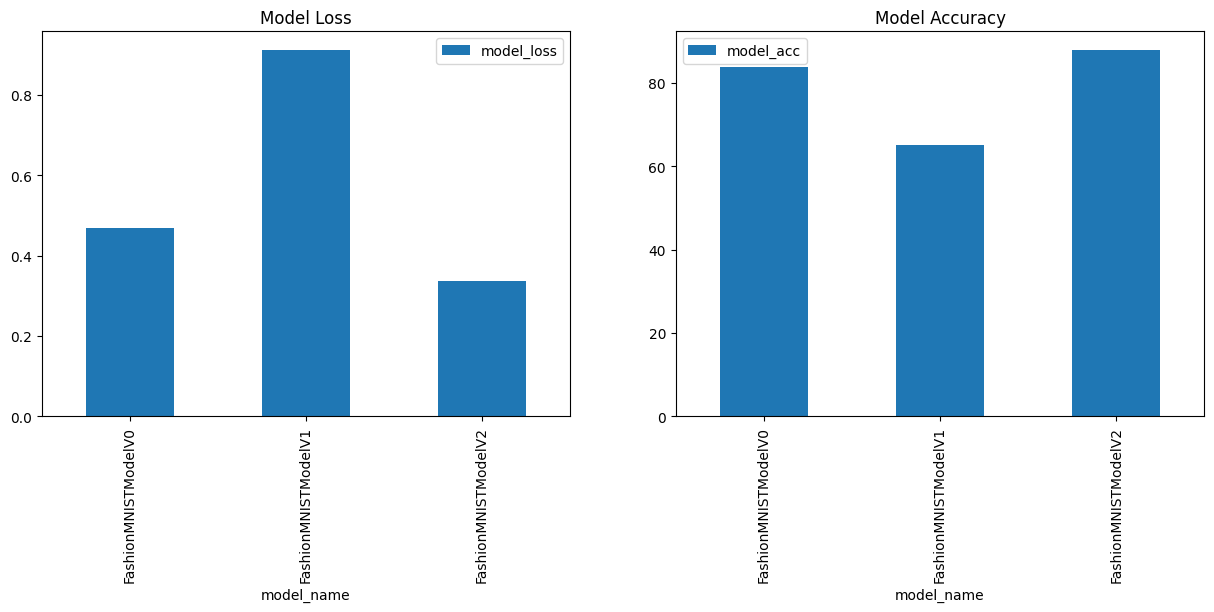

In [167]:
# plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
compare_results.plot(x='model_name', y='model_loss', kind='bar', ax=ax[0], title='Model Loss')
compare_results.plot(x='model_name', y='model_acc', kind='bar', ax=ax[1], title='Model Accuracy')
plt.show()


## 9. make and evaluate random predictions with best model


In [169]:
def make_predictions(
        model: torch.nn.Module,
        data: list,
        device: torch.device = device
):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass
            pred_logits = model(sample)

            # Get predicted class probabilities
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())

    # Stack the predicted probabilities
    return torch.stack(pred_probs)


In [192]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

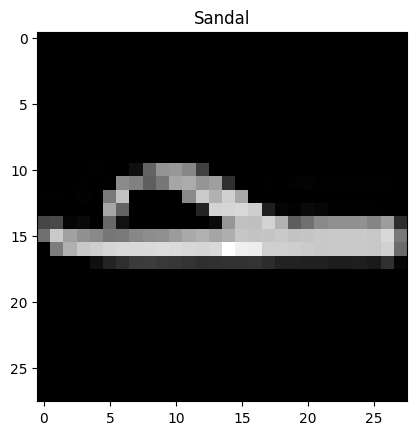

In [190]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(f"{class_names[test_labels[0]]}")

In [176]:
# Make predictions
pred_probs = make_predictions(model=model_2, 
                              data=test_samples
                              )

# View the predicted probabilities
pred_probs[0]

tensor([2.5436e-07, 3.7472e-10, 3.2161e-09, 7.2073e-09, 3.0315e-09, 9.9900e-01,
        1.4468e-06, 6.6156e-07, 2.6963e-05, 9.6684e-04])

In [178]:
# Get the predicted class
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 9, 4, 3, 0, 4, 7, 1])

In [184]:
def plot_predictions_images(images, labels, class_names, preds):
    """
    Plots images and labels with their predicted class names.
    """
    plt.figure(figsize=(12, 12))
    nrows, ncols = 3, 3

    for i, sample in enumerate(images):
        # Create subplot
        plt.subplot(nrows, ncols, i+1)

        # Plot the target image
        plt.imshow(sample.squeeze(), cmap='gray')

        # Find the predicted class
        pred_class = class_names[preds[i].item()]

        # Get the true class
        true_class = class_names[labels[i]]

        # Create the title for the plot
        title_text = f"Pred: {pred_class}, Actual: {true_class}"

        # Check if the prediction matches the true label
        if pred_class == true_class:
            plt.title(title_text, color='green')
        else:
            plt.title(title_text, color='red')

        plt.axis(False)
            

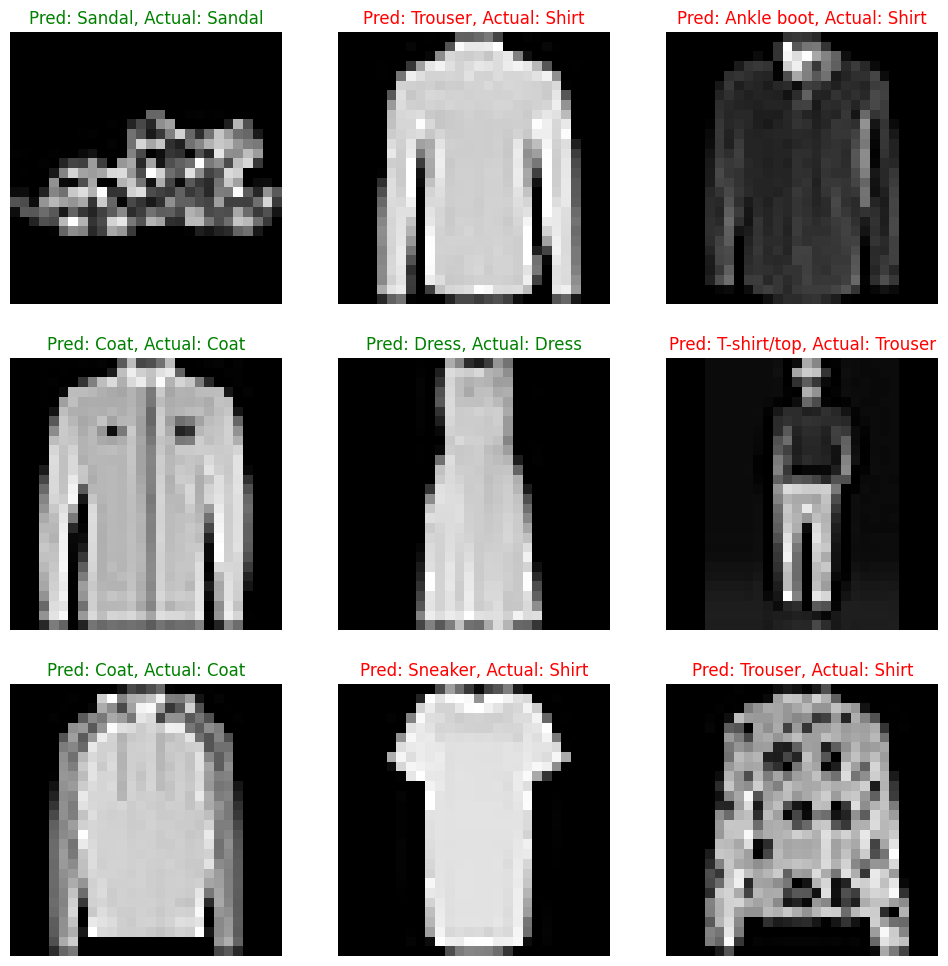

In [193]:
plot_predictions_images(images=test_samples,
                        labels=test_labels,
                        class_names=class_names,
                        preds=pred_classes)


## 10. Making a confusion matrix for the model

1. Make predictions with our trained model on test data
2. use `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using `mlxtend.plotting.plot.confusion_matrix()`

In [204]:
# make prediction on test dataset
from tqdm.auto import tqdm

# 1. Make predactions on the test dataset
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logits = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on CPU and append to y_preds list
        y_preds.extend(y_pred.cpu())

# Concatenate list of predictions into a single tensor
print(len(y_preds))
y_pred_tensor = torch.stack(y_preds)
y_pred_tensor

Making predictions: 100%|██████████| 313/313 [00:07<00:00, 42.72it/s] 


10000


tensor([9, 2, 1,  ..., 8, 1, 7])

In [203]:
len(y_pred_tensor)

10000

In [205]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [207]:
# 2. Setup confusion instance and compare prediction to targets
confmat = ConfusionMatrix(task='multiclass' , num_classes=len(class_names))
confmat_tensor = confmat(y_pred_tensor, 
                         test_data.targets)

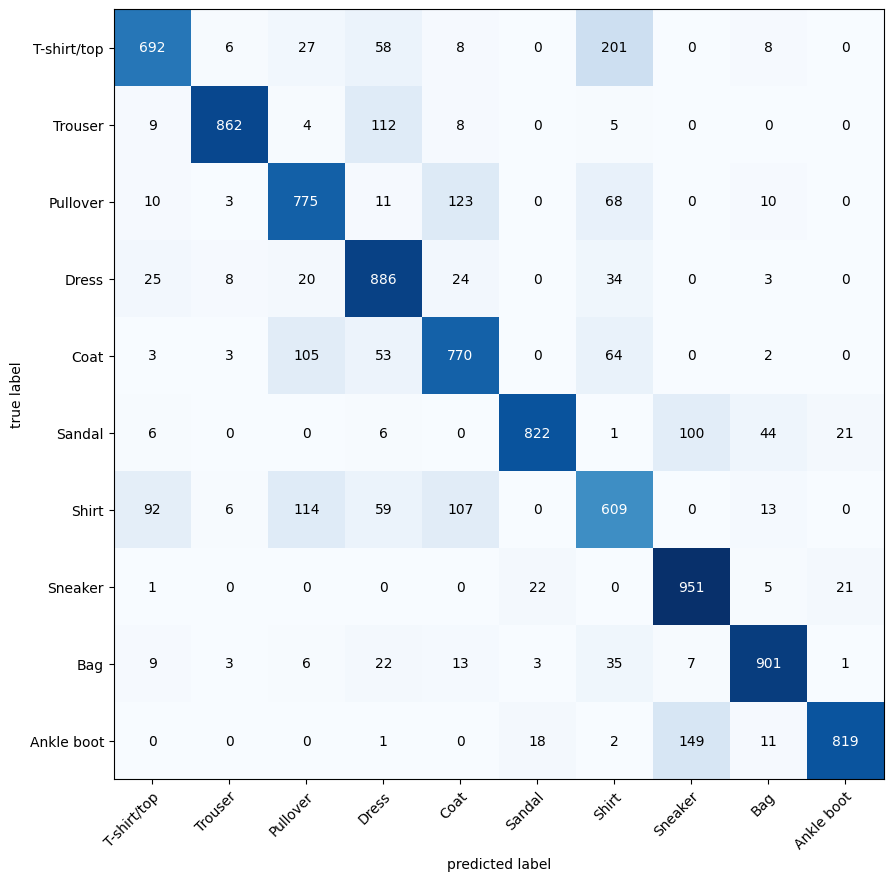

In [209]:
# 3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    confmat_tensor.numpy(),
    figsize=(10, 10),
    class_names=class_names)

## 11. Save and load the best performing model

In [211]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(exist_ok=True,
                 parents=True)

# Create model save
MODEL_NAME = 'pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(
    model_2.state_dict(),
    MODEL_SAVE_PATH
)

Saving model to: model\pytorch_computer_vision_model_2.pth


In [216]:
# Create a new instance of the model
torch.manual_seed(42)

model_2_clone = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

# Load the model state dict
model_2_clone.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

model_2_clone

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [217]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3362),
 'model_acc': tensor(87.8900)}

In [218]:
# Evaluate loaded model
torch.manual_seed(42)

clone_model_2_results = eval_model(
    model=model_2_clone,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    acc=acc
)

Batches: 100%|██████████| 313/313 [00:08<00:00, 37.78it/s] 


In [219]:
clone_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3362),
 'model_acc': tensor(87.8900)}

In [222]:
# Check if model results are close to each other
torch.isclose(
    model_2_results['model_loss'].clone().detach(),
    clone_model_2_results['model_loss'].clone().detach(),
)

tensor(True)